<a href="https://colab.research.google.com/github/laurilaatu/malis/blob/optimize/MALIS_Project_v0_see_misclassified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MALIS 2019 EURECOM
## Course Project

This is version zero of our semester project. We will load and prepare the data. Train a CNN to to extract features and use an ANN or SVM to classify the images.

### Description

**Task 1**: **bold text** Project definition for Group 34
	By:
Lauri Laatu
Marvin Mouroum


**•Context & problem definition**

Classifying images is a huge topic in machine learning. The goal for our project is to be able to classify images to multiple classes. More specifically we want to investigate if a simple convolutional neural network is able to classify internet memes correctly. As such our it is a supervised learning problem.


**•Methodology**

Convolution for feature extraction
RGB images will be fetched from a database
preprocessing to optimize image dimensions
convolution over three color channels of the images
exporting a feature vector containing compressed information about the image
ANN or SVM for classification based on extracted features
feature vectors as labeled input
supervised multiclass classification problem
dataset usage: initially we plan to start with n-fold cross validation and 10% testing
classification in predefined meme categories


**•Data**

The data will be acquired from the internet and labeled by hand if the data is unlabelled. Goal is to find around a thousand images per class.


# Dataset
Loading data from the dataset

In [0]:
import os.path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
from googleapiclient.http import MediaIoBaseDownload
from google.colab import drive as gdrive
from pydrive.auth import GoogleAuth

from IPython.display import Image

In [0]:
auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
gdrive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Copy raw pepe images to local directory

In [0]:
!mkdir  dataset

file_list = drive.ListFile({'q': "'10DpgRQAxqIU0TLYCruSGPaj3DfRzh6TE' in parents and trashed=false"}).GetList()

root = "/content/drive/My Drive/MALIS_Project/DataSet/rare-pepes/"
i = 0

#!cp "/content/drive/My Drive/MALIS_Project/DataSet/rare-pepes/001 - OdrldTF.png" "dataset/pepe_00.png"

for file in file_list:
  target = "'dataset/pepe_"+str(i)+".png'"
  src    = "'"+root+file['title']+"'"
  #print(src)
  #print(target)
  !cp $src $target
  i+=1

!ls -1 dataset



mkdir: cannot create directory ‘dataset’: File exists
pepe_0.png
pepe_1000.png
pepe_1001.png
pepe_1002.png
pepe_1003.png
pepe_1004.png
pepe_1005.png
pepe_1006.png
pepe_1007.png
pepe_1008.png
pepe_1009.png
pepe_100.png
pepe_1010.png
pepe_1011.png
pepe_1012.png
pepe_1013.png
pepe_1014.png
pepe_1015.png
pepe_1016.png
pepe_1017.png
pepe_1018.png
pepe_1019.png
pepe_101.png
pepe_1020.png
pepe_1021.png
pepe_1022.png
pepe_1023.png
pepe_1024.png
pepe_1025.png
pepe_1026.png
pepe_1027.png
pepe_1028.png
pepe_1029.png
pepe_102.png
pepe_1030.png
pepe_1031.png
pepe_1032.png
pepe_1033.png
pepe_1034.png
pepe_1035.png
pepe_1036.png
pepe_1037.png
pepe_1038.png
pepe_1039.png
pepe_103.png
pepe_1040.png
pepe_1041.png
pepe_1042.png
pepe_1043.png
pepe_1044.png
pepe_1045.png
pepe_1046.png
pepe_1047.png
pepe_1048.png
pepe_1049.png
pepe_104.png
pepe_1050.png
pepe_1051.png
pepe_1052.png
pepe_1053.png
pepe_1054.png
pepe_1055.png
pepe_1056.png
pepe_1057.png
pepe_1058.png
pepe_1059.png
pepe_105.png
pepe_1060.png
pep

### Resizing Image so it can be used by the CNN

In [0]:
def resize_img(img,destination):
  # Create square images from pepes by adding black margins preserving original aspect ratio
  #Importing modules opencv + numpy
  import cv2
  import numpy as np

  #Reading an image (you can use PNG or JPG)
  img = cv2.imread(img)

  if img is None:
    return False

  #Getting the bigger side of the image
  s = max(img.shape[0:2])

  #Creating a dark square with NUMPY  
  f = np.zeros((s,s,3),np.uint8)

  #Getting the centering position
  ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

  #Pasting the 'image' in a centering position
  f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img

  #Showing results (just in case) 
  #cv2.imshow("IMG",f)
  #A pause, waiting for any press in keyboard
  #cv2.waitKey(0)

  #Saving the image
  f = cv2.resize(f,(227,227),interpolation=cv2.INTER_AREA)
  cv2.imwrite(destination,f)
  cv2.destroyAllWindows() 
  return True

In [0]:
!mkdir resized
for i in range(0,1273):
  path =   "dataset/pepe_" + str(i) + ".png"
  _path = "'resized/pepe_" + str(i) + ".png'"
  prev_dest = "resized/pepe_" + str(i) + ".png"
  destination = "'/content/drive/My Drive/MALIS_Project/DataSet/resized_pepe/pepe_" + str(i) + ".png'"
  if not resize_img(path,prev_dest):
    print("error with", i)
  !cp $_path $destination 
  if(i%50 == 0):
    print(i)

0
50
error with 62
cp: cannot stat 'resized/pepe_62.png': No such file or directory
100
150
error with 198
cp: cannot stat 'resized/pepe_198.png': No such file or directory
200
error with 233
cp: cannot stat 'resized/pepe_233.png': No such file or directory
250
300
error with 316
cp: cannot stat 'resized/pepe_316.png': No such file or directory
error with 318
cp: cannot stat 'resized/pepe_318.png': No such file or directory
error with 328
cp: cannot stat 'resized/pepe_328.png': No such file or directory
350
400
error with 418
cp: cannot stat 'resized/pepe_418.png': No such file or directory
error with 438
cp: cannot stat 'resized/pepe_438.png': No such file or directory
450
error with 462
cp: cannot stat 'resized/pepe_462.png': No such file or directory
error with 478
cp: cannot stat 'resized/pepe_478.png': No such file or directory
500
550
error with 571
cp: cannot stat 'resized/pepe_571.png': No such file or directory
600
error with 636
cp: cannot stat 'resized/pepe_636.png': No such

### Prepare the Not Pepe Images

In [0]:
file_list = drive.ListFile({'q': "'1UBhhkryHE302KDQ8ufDvkfv7vozMZfli' in parents and trashed=false"}).GetList()

!mkdir dataset

root = "/content/drive/My Drive/MALIS_Project/DataSet/not-pepes/"
i = 0
rootfolder = "'"+root+"'"

#!cp "/content/drive/My Drive/MALIS_Project/DataSet/rare-pepes/001 - OdrldTF.png" "dataset/pepe_00.png"

for file in file_list:
  target = "dataset/not_pepe_"+str(i)+"."+file['title'].split('.')[-1]
  src    =  root+file['title']
  _src   = "'"+target+"'"  
  _target = "'/content/drive/My Drive/MALIS_Project/DataSet/resized_not_pepe/not_pepe_"+str(i)+"."+file['title'].split('.')[-1]+"'"
  
  if not resize_img(src,target):
    print("error with", i)
    continue
  !cp $_src $_target
  i+=1

mkdir: cannot create directory ‘dataset’: File exists


In [0]:
!ls '/content/drive/My Drive/MALIS_Project/DataSet/not-pepes/'

0001e89af2e511e282a322000a1f9709_7.jpg	3e3dfe58f2f111e2919b22000a9f1988_7.jpg
000b1ecef2ae11e2b39c22000a1f8adc_7.jpg	3e3fee82f2f811e2ab3c22000a1fc513_7.jpg
003abc60f31211e2a93822000ae9025c_7.jpg	3e55862aee2011e2a2e222000a9e48a3_7.jpg
003accdcf2f411e2b8e422000ae90193_7.jpg	3e626374858211e2a31922000a1fbcdc_7.jpg
004daf8af30f11e2b08222000ae91411_7.jpg	3e64be06f30211e28abf22000a1f9bf5_7.jpg
007cb396f31111e28fa722000a9f1885_7.jpg	3e6758c2f31711e28a7322000a1fa414_7.jpg
008ca570f31211e2999722000a1fcf03_7.jpg	3e6e7610f2a511e29f1422000a1fbc0e_7.jpg
00a14e5af31011e2a1bd22000a9f1361_7.jpg	3e7117d6f30311e286a022000a9e06e7_7.jpg
00ad1740f17a11e29f7222000a9f130b_7.jpg	3e773bfaf2fb11e2950722000a1fc86f_7.jpg
00ae3f6cf30511e2ba2422000a1f9376_7.jpg	3e78326af19a11e2a68422000a1fb163_7.jpg
00aeb624f29f11e29c3022000a1fb14d_7.jpg	3e78949ef2f811e2b96122000aa802d9_7.jpg
00c130aaf30e11e2985c22000a1f9ad3_7.jpg	3e7a0d14f31c11e28b6c22000a9e17e9_7.jpg
00c39696f30511e2abd422000a9f4de4_7.jpg	3e7b7538f2ee11e2855d22000

# Network

In [0]:
## PyTorch 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import Tensor
import torch.optim as optim
import torchvision

import math #for calculus
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Defining the Network class

In [0]:
class PepeNN(nn.Module):   
    
    def __init__(self,name='PepeNN'):
        super(PepeNN, self).__init__()
        self.T = 120
        
        self.name = name
        
        self.training_epochs = 0
        
        self.lr_history       = []
        self.accuracy_history = []
        self.loss_history     = []
        
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        #torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

        self.conv1 = nn.Conv2d(3,20,  kernel_size=(11,11),stride=(4,4),padding=(1,1),dilation=(1,1))
        self.batchnorm1 = nn.BatchNorm2d(20)
        self.conv2 = nn.Conv2d(20,40,kernel_size=(5,5),stride=(2,2),padding=(1,1),dilation=(1,1))
        self.batchnorm2 = nn.BatchNorm2d(40)

        self.pooling1 = nn.MaxPool2d( kernel_size=(5,5), stride=(2,2), padding=(1,1), dilation=(1,1))

        self.conv3 = nn.Conv2d(40,20,kernel_size=(3,3),stride=(2,2),padding=(1,1),dilation=(1,1))
        self.batchnorm3 = nn.BatchNorm2d(20)
        self.conv4 = nn.Conv2d(20,10,kernel_size=(2,2),stride=(1,1),padding=(0,0),dilation=(1,1))
        self.batchnorm4 = nn.BatchNorm2d(10)

        self.pooling2 = nn.MaxPool2d(kernel_size=(2,2), stride=(1,1), padding=(0,0), dilation=(1,1))
        
        #fully connected at the end

        #self.fc1 = torch.nn.Linear(in_features=250, out_features=2)
        self.fc1 = torch.nn.Linear(in_features=250, out_features=25)

        self.fc2 = torch.nn.Linear(in_features=25, out_features=2)
    
        
        # robust weight initialization
        torch.nn.init.xavier_normal_(self.conv1.weight)
        torch.nn.init.xavier_normal_(self.conv2.weight)
        torch.nn.init.xavier_normal_(self.conv3.weight)
        torch.nn.init.xavier_normal_(self.conv4.weight)

        torch.nn.init.xavier_normal_(self.fc1.weight)
        #torch.nn.init.xavier_normal_(self.fc2.weight)
      

        
    def forward(self, x):

        batchSize = x.shape[0]

        # first set of CNNs and then a max pool
        #print("starting with " + str(x.shape))
        x = self.conv1(x)
       # print("after 1 " + str(x.shape))
        x = self.batchnorm1(x)
        x = F.relu(x)
        
        x = self.conv2(x)
        #print("after 2 " + str(x.shape))
        x = self.batchnorm2(x)
        x = F.relu(x)
        
        x = self.pooling1(x)
        #print("after 3 " + str(x.shape))
        
        # second set
        
        x = self.conv3(x)
        #print("after 4 " + str(x.shape))
        x = self.batchnorm3(x)
        x = F.relu(x)
        
        x = self.conv4(x)
        #print("after 5 " + str(x.shape))
        x = self.batchnorm4(x)
        x = F.relu(x)
        
        x = self.pooling2(x)
        #print("after 6 " + str(x.shape))

        x= self.fc1(x.reshape((batchSize,250)))
        x = F.relu(x)
        x= self.fc2(x)

        x= F.softmax(x,dim=1)
        
        return x
      
    def save(self,root='gdrive/My\ Drive/MALIS_Project'):
      !mkdir $root
  
      path = root.replace('\\','') + '/' + self.name + '.pickle'
    
      print("\nsaving network under:\n",path)
      
      with open(path, 'wb') as f:
        pickle.dump(self, f)
        
    def next_epoch(self,lr,acc_hist,loss_hist):
      self.training_epochs += 1
      self.lr_history.append(lr)
      self.accuracy_history.append(acc_hist)
      self.loss_history.append(loss_hist)
    
    def reset(self):
      self.training_epochs = 0
      self.lr_history = []
      self.accuracy_history = []
      self.loss_history = []

Creating n folds

In [7]:
#!ls "/content/drive/My Drive/MALIS_Project/DataSet/"


# id for Dataset folder 1ugHotUpAsw1o-V8JvN7JwEXWNv-tTp-i

file_list = drive.ListFile(
    {'q': "'1ugHotUpAsw1o-V8JvN7JwEXWNv-tTp-i' in parents"}).GetList()

# create an array of tuples with (id, label, fold,file)

dataset = []
npepes = []

pepes = []
pepe_index = 0

for i in file_list:
  if "resized" in i['title']:
    if "not" in i['title']:
      print(i)
      for notpepe in drive.ListFile({'q': "'%s' in parents"%(i['id']) }).GetList():
        # 
        npepes.append((pepe_index, 0, None, notpepe))
        pepe_index += 1
      #print(i)
    else:
      for pepe in drive.ListFile({'q': "'%s' in parents"%(i['id']) }).GetList():
        # 
        pepes.append((pepe_index, 1, None, pepe))      
        pepe_index += 1
      #print(i)
    
  

print(len(npepes),len(pepes))

folds = 6
for fold in range(folds):
  foldsize = int(len(npepes)/folds)
  for i in range(fold*foldsize, (fold+1)*foldsize):
    npepes[i] = (npepes[i][0], npepes[i][1], fold, npepes[i][3])

for i in range(len(npepes)-1,1, -1):
  if npepes[i][2] is None:
    npepes[i] = (npepes[i][0], npepes[i][1], folds-1, npepes[i][3])
  else:
    break

for fold in range(folds):
  foldsize = int(len(pepes)/folds)
  for i in range(fold*foldsize, (fold+1)*foldsize):
    pepes[i] = (pepes[i][0], pepes[i][1], fold, pepes[i][3])

for i in range(len(pepes)-1,1, -1):
  if pepes[i][2] is None:
    pepes[i] = (pepes[i][0], pepes[i][1], folds-1, pepes[i][3])
  else:
    break

for x in npepes[-5:]:
  print(x)

for x in pepes[-5:]:
  print(x)

# now we have labeled dataset partitioned into n number of folds  
dataset = npepes+pepes
print(len(dataset))


    

#print(file_list)

GoogleDriveFile({'kind': 'drive#file', 'id': '10R3BKAh8LzgqP1bYFYZGlEVL-9C1KNo3', 'etag': '"30jMLj3-m0JdGNLPUS2QqbEXiN0/MTU3NjUzNjg5OTE0Ng"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/10R3BKAh8LzgqP1bYFYZGlEVL-9C1KNo3', 'alternateLink': 'https://drive.google.com/drive/folders/10R3BKAh8LzgqP1bYFYZGlEVL-9C1KNo3', 'embedLink': 'https://drive.google.com/embeddedfolderview?id=10R3BKAh8LzgqP1bYFYZGlEVL-9C1KNo3', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder+shared', 'title': 'resized_not_pepe', 'mimeType': 'application/vnd.google-apps.folder', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2019-12-16T22:54:59.146Z', 'modifiedDate': '2019-12-16T22:54:59.146Z', 'lastViewedByMeDate': '2020-01-14T13:15:03.038Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'version': '8', 'parents': [{'kind': 'drive#parentRefere

In [0]:
dataset[3000]

(3000,
 1,
 4,
 GoogleDriveFile({'kind': 'drive#file', 'id': '1D72bBKjp3oziY4X_KN9vSi5-wvRE1-Hf', 'etag': '"30jMLj3-m0JdGNLPUS2QqbEXiN0/MTU3OTExNDIwMDIwOA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1D72bBKjp3oziY4X_KN9vSi5-wvRE1-Hf', 'webContentLink': 'https://drive.google.com/uc?id=1D72bBKjp3oziY4X_KN9vSi5-wvRE1-Hf&export=download', 'alternateLink': 'https://drive.google.com/file/d/1D72bBKjp3oziY4X_KN9vSi5-wvRE1-Hf/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1D72bBKjp3oziY4X_KN9vSi5-wvRE1-Hf/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/image/png', 'thumbnailLink': 'https://lh3.googleusercontent.com/N2-Jiq0gJwKyT32piRsuuK3iPu0oQJmUgivNWNgilGT5OCCuIv6mEvL_4NgtCfpMW-YEun4E3GQ=s220', 'title': 'pepe_232.png', 'mimeType': 'image/png', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2019-12-16T14:31:48.

### Methods for training the network

Some methods...

In [0]:
def get_cost_function():
    
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function
    
def get_optimizer(net, lr, wd, momentum):
  #optimizer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=wd, momentum=momentum)
  optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
  return optimizer

In [0]:
def test(net,t_data,t_labels, cost_function, device='cuda:0'):
  
  net.eval()

  cumulative_loss = 0
  accuracy = 0

  samples = t_data.shape[0]

  misclassified_imgs = []
  
  with torch.no_grad():

    mean = t_data.mean()
    std  = t_data.std()
    
    #t_data = (t_data - mean)/std
    
    # Load data into GPU
    inputs = torch.LongTensor((t_data - mean)/std).float().to(device)
    targets = torch.LongTensor(t_labels).to(device)
        
    # Forward pass
    outputs = net(inputs)
      
    # Apply the loss
    loss = cost_function(outputs, targets)

    #print("loss " +str(loss))
    cumulative_loss += loss.item()
    #print("cim loss " +str(cumulative_loss))
    _, predicted = outputs.max(1)
    #print("ourputs -> " , outputs)
    print("predicted -> " , predicted)
    print("targets   -> " , targets)
    misclassified = (predicted.eq(targets) == 0).nonzero()
    for i in misclassified:
        misclassified_imgs.append((i, predicted[i]))
    accuracy += predicted.eq(targets).sum().item()/samples
    #print("accuracy " + str(accuracy))

  return cumulative_loss, accuracy, misclassified_imgs

In [0]:
def train(net,t_data,t_labels,optimizer,cost_function, device='cuda:0'):
  net.train()

  cumulative_loss = 0
  accuracy = 0

  samples = t_data.shape[0]

  mean = t_data.mean()
  std  = t_data.std()
      
  t_data = (t_data - mean)/std
      
  # Load data into GPU
  inputs = torch.LongTensor(t_data).float().to(device)
  targets = torch.LongTensor(t_labels).to(device)
        
  # Forward pass
  outputs = net(inputs)
      
  # Apply the loss
  loss = cost_function(outputs, targets)

  # Backward pass
  loss.backward()
    
  # Update parameters
  optimizer.step()
    
  # Reset the optimizer
  optimizer.zero_grad()

  #print("loss " +str(loss))
  cumulative_loss += loss.item()
  #print("cim loss " +str(cumulative_loss))
  _, predicted = outputs.max(1)
  #print("ourputs -> " , outputs)
  #print("predicted -> " , predicted)
  #print("targets   -> " , targets)
  accuracy += predicted.eq(targets).sum().item()/samples
  #print("accuracy " + str(accuracy))

  return cumulative_loss, accuracy

In [0]:
net = PepeNN()

In [0]:
from random import shuffle

#dataset[3000][1] -> label
#dataset[3000][2] -> n fold

#
#first_fold = list(filter(lambda x: x[2] == 0, dataset))
#second_fold = list(filter(lambda x: x[2] == 1, dataset))
#third_fold = list(filter(lambda x: x[2] == 2, dataset))
#fourth_fold = list(filter(lambda x: x[2] == 3, dataset))
#fifth_fold = list(filter(lambda x: x[2] == 4, dataset))

test_data = list(filter(lambda x: x[2] == 5, dataset))
#print(len(first_fold))

trainingData = [ list(filter(lambda x: x[2] == i, dataset)) for i in range(5) ]

def getTrainingData(n_fold):

  shuffle(n_fold)

  #images  = list(map(lambda x: x[3], n_fold))
  #classes  = list(map(lambda x: x[2], n_fold))
  #labels = list(map(lambda x: x[1], n_fold))

  #imageArray = np.zeros((len(images),227,227,3))
  imageArray = np.zeros((len(n_fold),227,227,3))

  for i in range(0,len(n_fold)):
    standard = '/content/drive/My Drive/'
    root = standard + 'MALIS_Project/DataSet/'

    if (n_fold[i][1] == 0):
      root = root + 'resized_not_pepe/'

    else:
      root = root + 'resized_pepe/'

    filepath = root + n_fold[i][3]['title']
    #print(filepath)
    image = cv2.imread(filepath) #numpy array
    if image.size == 0:
      print("empty image")
    imageArray[i] = image

  return imageArray, list(map(lambda x: x[1], n_fold))




In [13]:

device='cuda:0'
net.to(device)

testLoss = 0
trainLoss = 0
total_acc = 0
counter = 0

max_epochs = 15

for e in range(0,max_epochs):
  
  if counter > 0 and total_acc/counter > 0.99:
    print("accuracy high enough aborting")
    break

  print("On epoch ", e)

  for _n in range(0,5):
    imageArray, labels = getTrainingData(trainingData[_n])
    a=0
    n=20
    N= imageArray.shape[0]

    intervall = n-a

    for i in range(0,N,intervall):
    
      a = i
      n = i + intervall

      if n >= N:
        continue

      t_data   = np.transpose(imageArray[a:n].reshape((n-a,227,227,3)), (0,3, 1, 2))
      t_labels = np.array([labels[a:n]]).reshape((n-a,))

      if t_data.size == 0:
        print("skip")
        continue

      #tLoss, accuracy =test(net,t_data,t_labels,get_cost_function(),device)
      #testLoss += tLoss

      optimizer = get_optimizer(net, lr=0.01, wd=1e-6, momentum=0.9)

      Loss, accuracy = train(net,t_data,t_labels,optimizer,get_cost_function(),device)
      trainLoss += Loss
      #print("accumulated loss = " +str(trainLoss))
      #print("accuracy -> " + str(accuracy))
      total_acc += accuracy
      counter += 1

    print("\t on fold", _n)
  print("accuracy ",total_acc/counter)
    



On epoch  0
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.7537037037037039
On epoch  1
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.7890740740740747
On epoch  2
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8049382716049388
On epoch  3
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8142592592592596
On epoch  4
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8222222222222222
On epoch  5
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8274074074074076
On epoch  6
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8342328042328043
On epoch  7
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8403703703703711
On epoch  8
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8430452674897132
On epoch  9
	 on fold 0
	 on fold 1
	 on fold 2
	 on fold 3
	 on fold 4
accuracy  0.8448888

testdata size:  548
predicted ->  tensor([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
       device='cuda:0')
targets   ->  tensor([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
       device='cuda:0')


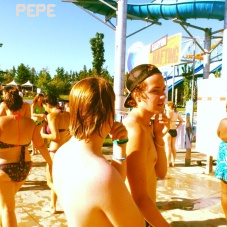

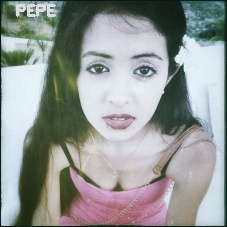

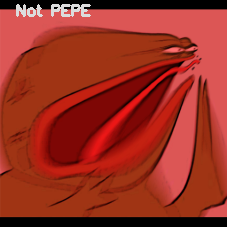

predicted ->  tensor([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       device='cuda:0')
targets   ->  tensor([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       device='cuda:0')


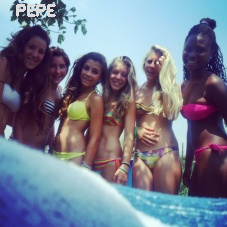

predicted ->  tensor([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       device='cuda:0')


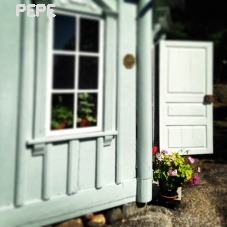

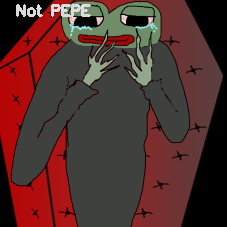

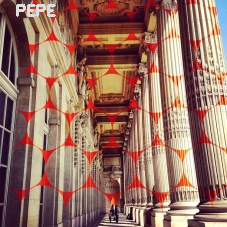

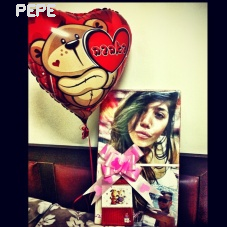

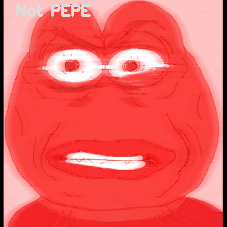

predicted ->  tensor([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       device='cuda:0')
targets   ->  tensor([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       device='cuda:0')


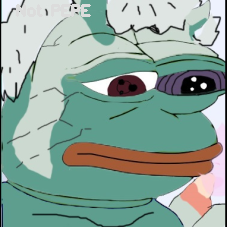

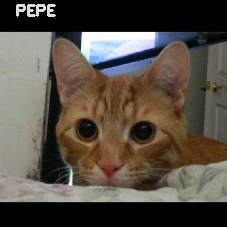

predicted ->  tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
       device='cuda:0')
targets   ->  tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       device='cuda:0')


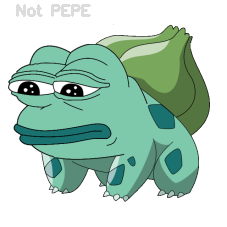

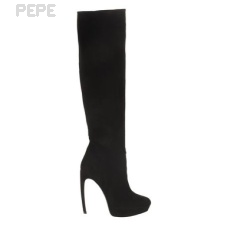

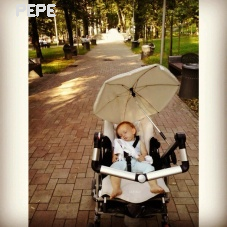

predicted ->  tensor([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       device='cuda:0')


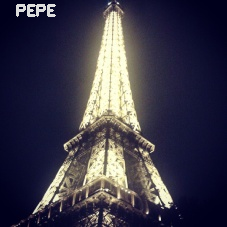

predicted ->  tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       device='cuda:0')
targets   ->  tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       device='cuda:0')


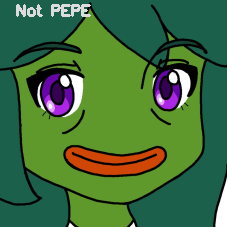

predicted ->  tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       device='cuda:0')
targets   ->  tensor([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       device='cuda:0')


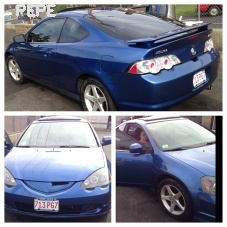

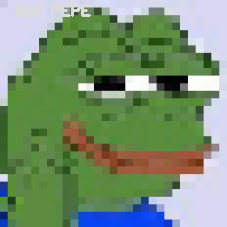

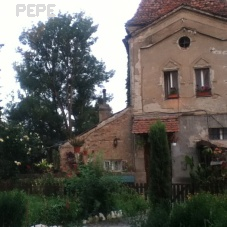

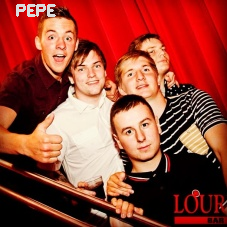

predicted ->  tensor([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
       device='cuda:0')
targets   ->  tensor([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       device='cuda:0')


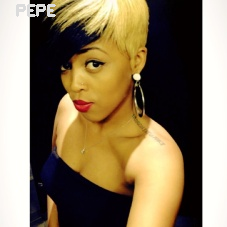

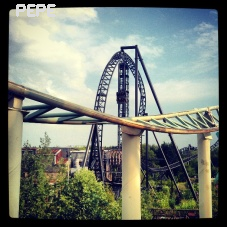

predicted ->  tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       device='cuda:0')


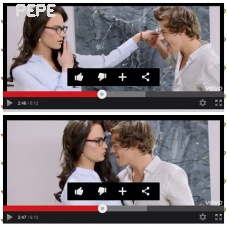

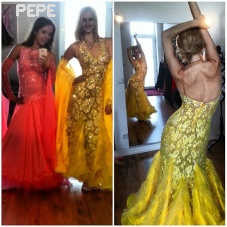

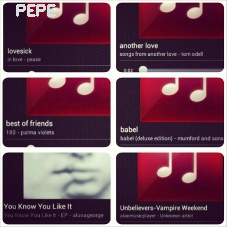

predicted ->  tensor([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       device='cuda:0')
targets   ->  tensor([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       device='cuda:0')
predicted ->  tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
       device='cuda:0')
targets   ->  tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       device='cuda:0')


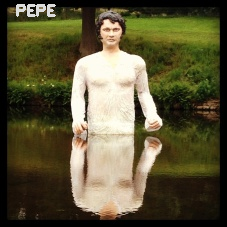

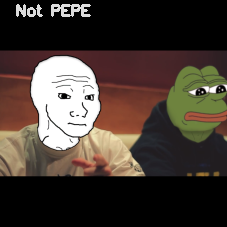

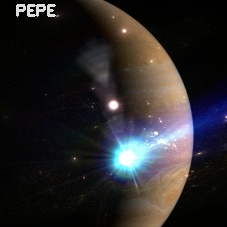

predicted ->  tensor([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       device='cuda:0')
targets   ->  tensor([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       device='cuda:0')


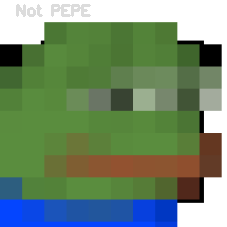

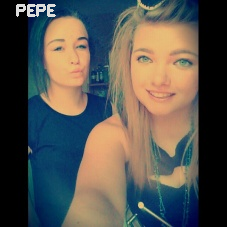

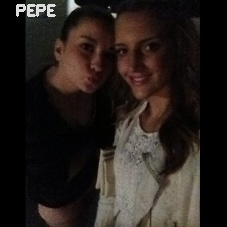

predicted ->  tensor([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       device='cuda:0')


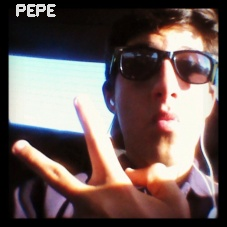

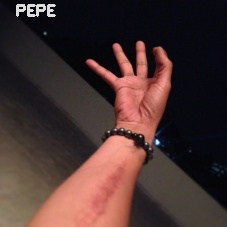

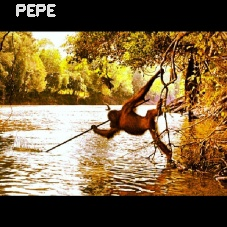

predicted ->  tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
       device='cuda:0')
targets   ->  tensor([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       device='cuda:0')


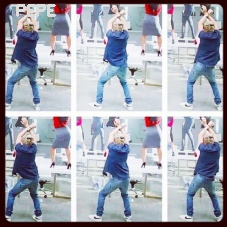

predicted ->  tensor([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       device='cuda:0')
targets   ->  tensor([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       device='cuda:0')


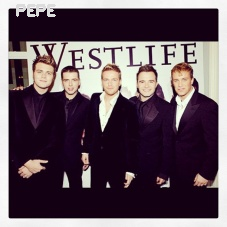

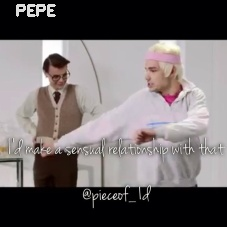

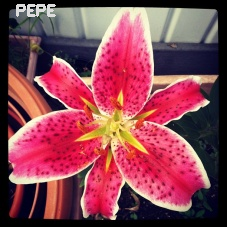

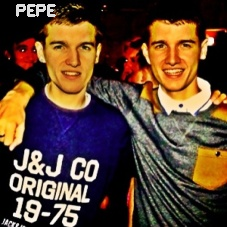

predicted ->  tensor([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       device='cuda:0')
targets   ->  tensor([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
       device='cuda:0')


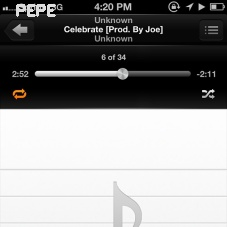

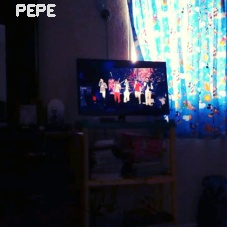

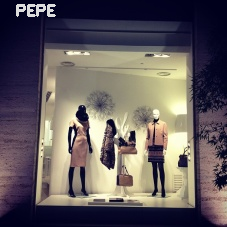

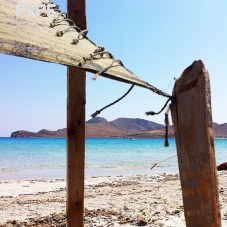

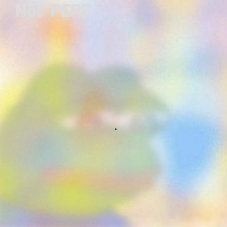

predicted ->  tensor([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       device='cuda:0')


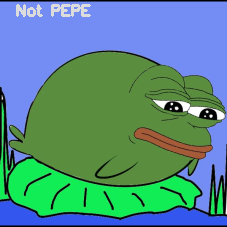

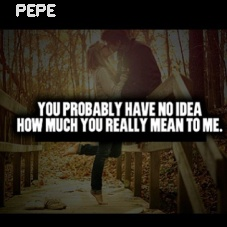

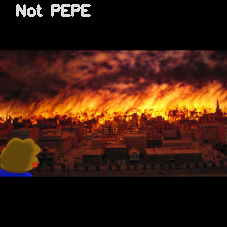

predicted ->  tensor([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       device='cuda:0')


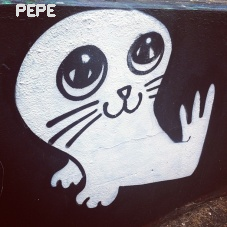

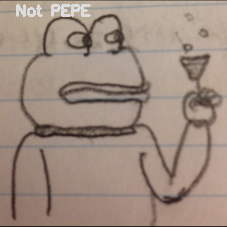

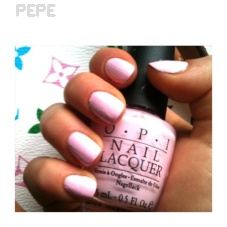

predicted ->  tensor([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       device='cuda:0')
targets   ->  tensor([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       device='cuda:0')


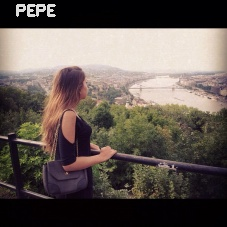

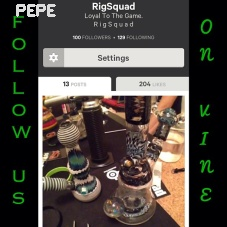

predicted ->  tensor([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')


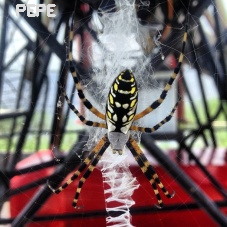

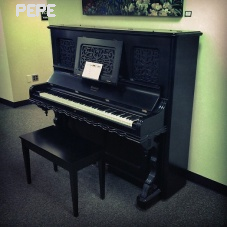

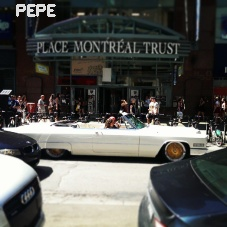

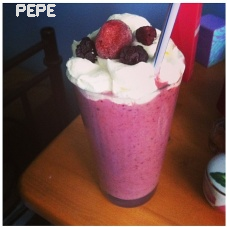

predicted ->  tensor([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       device='cuda:0')
targets   ->  tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1],
       device='cuda:0')


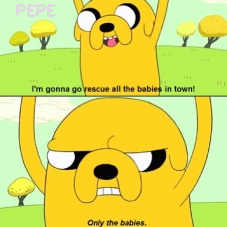

predicted ->  tensor([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       device='cuda:0')
targets   ->  tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       device='cuda:0')


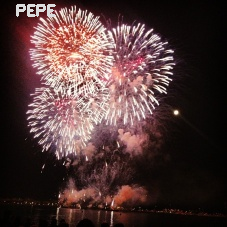

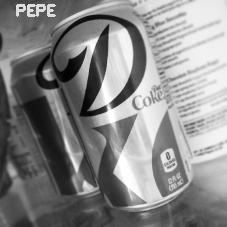

predicted ->  tensor([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       device='cuda:0')
targets   ->  tensor([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       device='cuda:0')


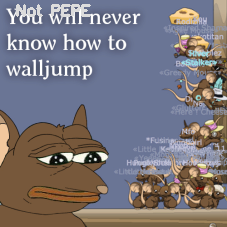

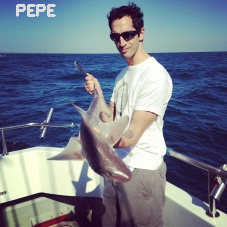

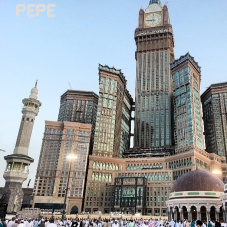

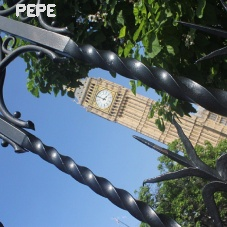

predicted ->  tensor([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       device='cuda:0')


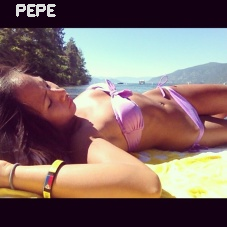

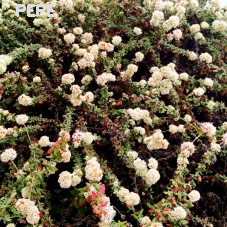

predicted ->  tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       device='cuda:0')


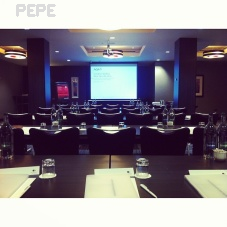

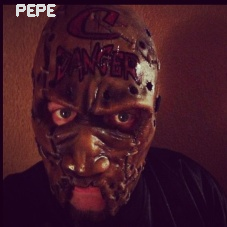

predicted ->  tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0],
       device='cuda:0')
targets   ->  tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
       device='cuda:0')


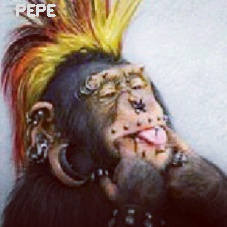

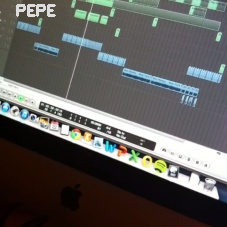

predicted ->  tensor([1, 1, 1, 1, 0, 0, 0, 0], device='cuda:0')
targets   ->  tensor([0, 1, 0, 1, 0, 0, 0, 0], device='cuda:0')


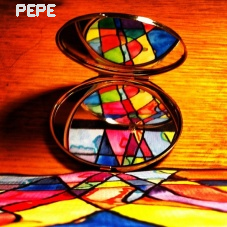

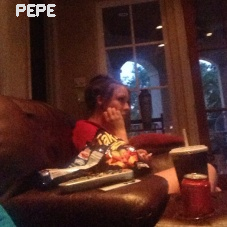

loss 0.5721588134765625
acc 0.75
correctly classified 0.8704379562043796


In [26]:
from google.colab.patches import cv2_imshow

font                   = cv2.FONT_HERSHEY_SIMPLEX
fontScale              = .5
fontColor              = (220,220,220)
lineType               = 2


imageArray, labels = getTrainingData(test_data)
#N = 100 
N = imageArray.shape[0]
asdf = 0
print("testdata size: ", N)
for i in range(0,N,20):
  a = i
  n = min(i + 20, N)
  if n > N:
    break
  t_data   = np.transpose(imageArray[a:n].reshape((n-a,227,227,3)), (0,3, 1, 2))
  t_labels = np.array([labels[a:n]]).reshape((n-a,))
  tLoss, taccuracy, missclassified = test(net,t_data,t_labels,get_cost_function(),device)
  asdf += len(missclassified)
  for i in missclassified:
    #print("classified as:", str(i[1]), i)
    img = imageArray[a:n][i[0]]
    cv2.putText(img,
            'Not PEPE' if i[1] == 0 else "PEPE", 
            (15,15), 
            font, 
            fontScale,
            fontColor,
            lineType)
    cv2_imshow(img)

print("loss", tLoss)
print("acc", taccuracy)
print("correctly classified", 1-asdf/N)

#for i in missclassified:
#  print("classified as:", str(i[1]), i)
#  cv2_imshow(imageArray[a:n][i[0]])

# Summary

## Performance

learning rate: **0.01**

epochs: **10**

train accuracy: **0.0**

test accuracy: **0.0**
